In [33]:
# Import required libraries and dependencies

import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
from pathlib import Path

%matplotlib inline


In [34]:
# Load .env enviroment variables into the notebook
load_dotenv()

True

In [35]:
# Get the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv('QUANDL_API_KEY')

# Using the type funcion, confirm that the Quandl API key is available for use in the notebook
type(quandl_api_key)


str

In [36]:
# Create `start_date` and `end_date` variables
# Both should hold the same date of `2020-07-31`
start_date = "2019-07-01"
end_date = "2021-07-01"


In [37]:
# Set the endpoint URL to access the endpoint for the Volatility Index
vix = "https://www.quandl.com/api/v3/datasets/CHRIS/CBOE_VX3?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + quandl_api_key


In [52]:
# Make the API call for the Volatility Index information using requests.get
response_vix= requests.get(vix).json()

# Print the response data using the json.dumps function.
# print(json.dumps(response_vix, indent=4, sort_keys=True))


In [39]:
# Set the Volatility Index data to create a DataFrame
volatility_index_data = []

for item in response_vix["dataset"]["data"]:
        volatility_index_data.append(response_vix["dataset"]["data"])

volatility_index_data[0][0][0]

'2021-06-29'

In [49]:
data = pd.DataFrame.from_dict(volatility_index_data[0], orient='columns')

In [50]:
data

,0,1,2,3,4,5,6,7,8,9
0,2021-06-29,20.75,21.15,20.53,20.90,21.1010,0.3510,8984.0,0.0,31969.0
1,2021-06-28,20.70,20.96,20.56,20.75,20.7500,-0.0998,6994.0,0.0,32149.0
2,2021-06-25,20.90,21.07,20.75,20.75,20.8498,-0.1002,8235.0,0.0,31972.0
3,2021-06-24,21.16,21.20,20.77,20.87,20.9500,-0.3190,8504.0,0.0,31760.0
4,2021-06-23,21.42,21.55,21.05,21.10,21.2690,-0.3310,11366.0,0.0,32426.0
...,...,...,...,...,...,...,...,...,...,...
499,2019-07-08,16.15,16.50,16.06,16.44,16.4250,0.3000,27763.0,0.0,38648.0
500,2019-07-05,16.08,16.60,16.00,16.12,16.1250,0.0500,24137.0,0.0,36772.0
501,2019-07-03,16.16,16.32,16.05,16.05,16.0750,-0.0500,16116.0,0.0,34955.0
502,2019-07-02,16.57,16.70,16.10,16.15,16.1250,-0.4500,28151.0,0.0,35223.0


In [53]:
columns = ["Trade Date",
            "Open",
            "High",
            "Low",
            "Close",
            "Settle",
            "Change",
            "Total Volume",
            "EFP",
            "Prev. Day Open Interest"]

data.columns = columns

data

,Trade Date,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
0,2021-06-29,20.75,21.15,20.53,20.90,21.1010,0.3510,8984.0,0.0,31969.0
1,2021-06-28,20.70,20.96,20.56,20.75,20.7500,-0.0998,6994.0,0.0,32149.0
2,2021-06-25,20.90,21.07,20.75,20.75,20.8498,-0.1002,8235.0,0.0,31972.0
3,2021-06-24,21.16,21.20,20.77,20.87,20.9500,-0.3190,8504.0,0.0,31760.0
4,2021-06-23,21.42,21.55,21.05,21.10,21.2690,-0.3310,11366.0,0.0,32426.0
...,...,...,...,...,...,...,...,...,...,...
499,2019-07-08,16.15,16.50,16.06,16.44,16.4250,0.3000,27763.0,0.0,38648.0
500,2019-07-05,16.08,16.60,16.00,16.12,16.1250,0.0500,24137.0,0.0,36772.0
501,2019-07-03,16.16,16.32,16.05,16.05,16.0750,-0.0500,16116.0,0.0,34955.0
502,2019-07-02,16.57,16.70,16.10,16.15,16.1250,-0.4500,28151.0,0.0,35223.0


In [55]:
data2 = data.set_index('Trade Date')

data2

,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
Trade Date,,,,,,,,,
2021-06-29,20.75,21.15,20.53,20.90,21.1010,0.3510,8984.0,0.0,31969.0
2021-06-28,20.70,20.96,20.56,20.75,20.7500,-0.0998,6994.0,0.0,32149.0
2021-06-25,20.90,21.07,20.75,20.75,20.8498,-0.1002,8235.0,0.0,31972.0
2021-06-24,21.16,21.20,20.77,20.87,20.9500,-0.3190,8504.0,0.0,31760.0
2021-06-23,21.42,21.55,21.05,21.10,21.2690,-0.3310,11366.0,0.0,32426.0
...,...,...,...,...,...,...,...,...,...
2019-07-08,16.15,16.50,16.06,16.44,16.4250,0.3000,27763.0,0.0,38648.0
2019-07-05,16.08,16.60,16.00,16.12,16.1250,0.0500,24137.0,0.0,36772.0
2019-07-03,16.16,16.32,16.05,16.05,16.0750,-0.0500,16116.0,0.0,34955.0


In [57]:
data3 = data2.drop(columns = ["Open",
            "High",
            "Low",
            "Settle",
            "Change",
            "Total Volume",
            "EFP",
            "Prev. Day Open Interest"])

data3

,Close
Trade Date,
2021-06-29,20.90
2021-06-28,20.75
2021-06-25,20.75
2021-06-24,20.87
2021-06-23,21.10
...,...
2019-07-08,16.44
2019-07-05,16.12
2019-07-03,16.05


<AxesSubplot:xlabel='Trade Date'>

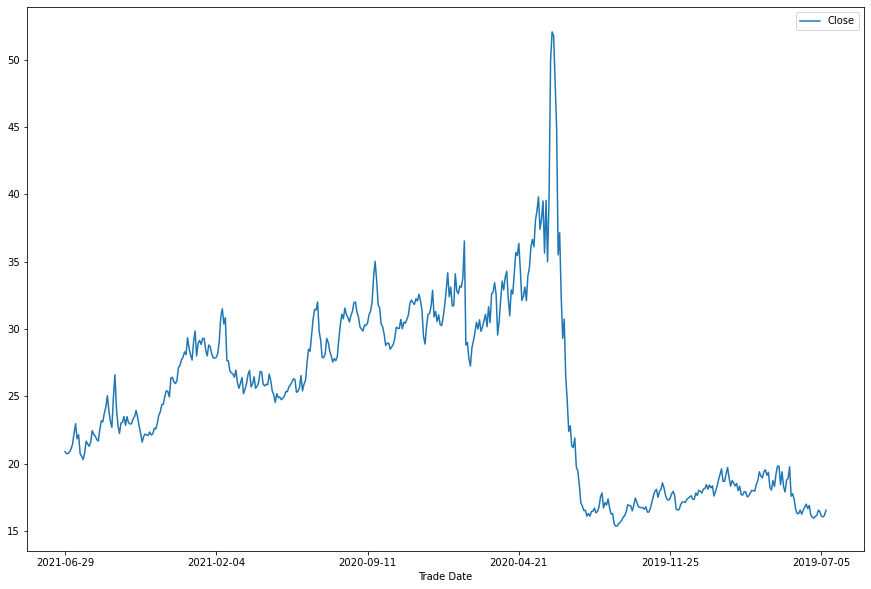

In [63]:
data3.plot(figsize=(15,10))

In [61]:
data_pct_change = data3.pct_change().dropna()

data_pct_change

,Close
Trade Date,
2021-06-28,-0.007177
2021-06-25,0.000000
2021-06-24,0.005783
2021-06-23,0.011021
2021-06-22,0.016588
...,...
2019-07-08,-0.006647
2019-07-05,-0.019465
2019-07-03,-0.004342
